# Quantum Teleportation 
Date: Sept 19, 2020
By: Sanjib Katuwal

Suppose we want to send a qubit state $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ from Sita to Ram. The difficulty is, according to no-cloning theorem, one cannot just make an exact copy of an unknown quantum state. However, we can create a protocol which will transfer the state from Sita to Ram. It is called Teleportation because, at the end, Ram will have the state but Sita won't.
In doing so, they will use a third party, say Laxman, to send them an entangled qubit pair.
### Mathematics Behind the Implementation
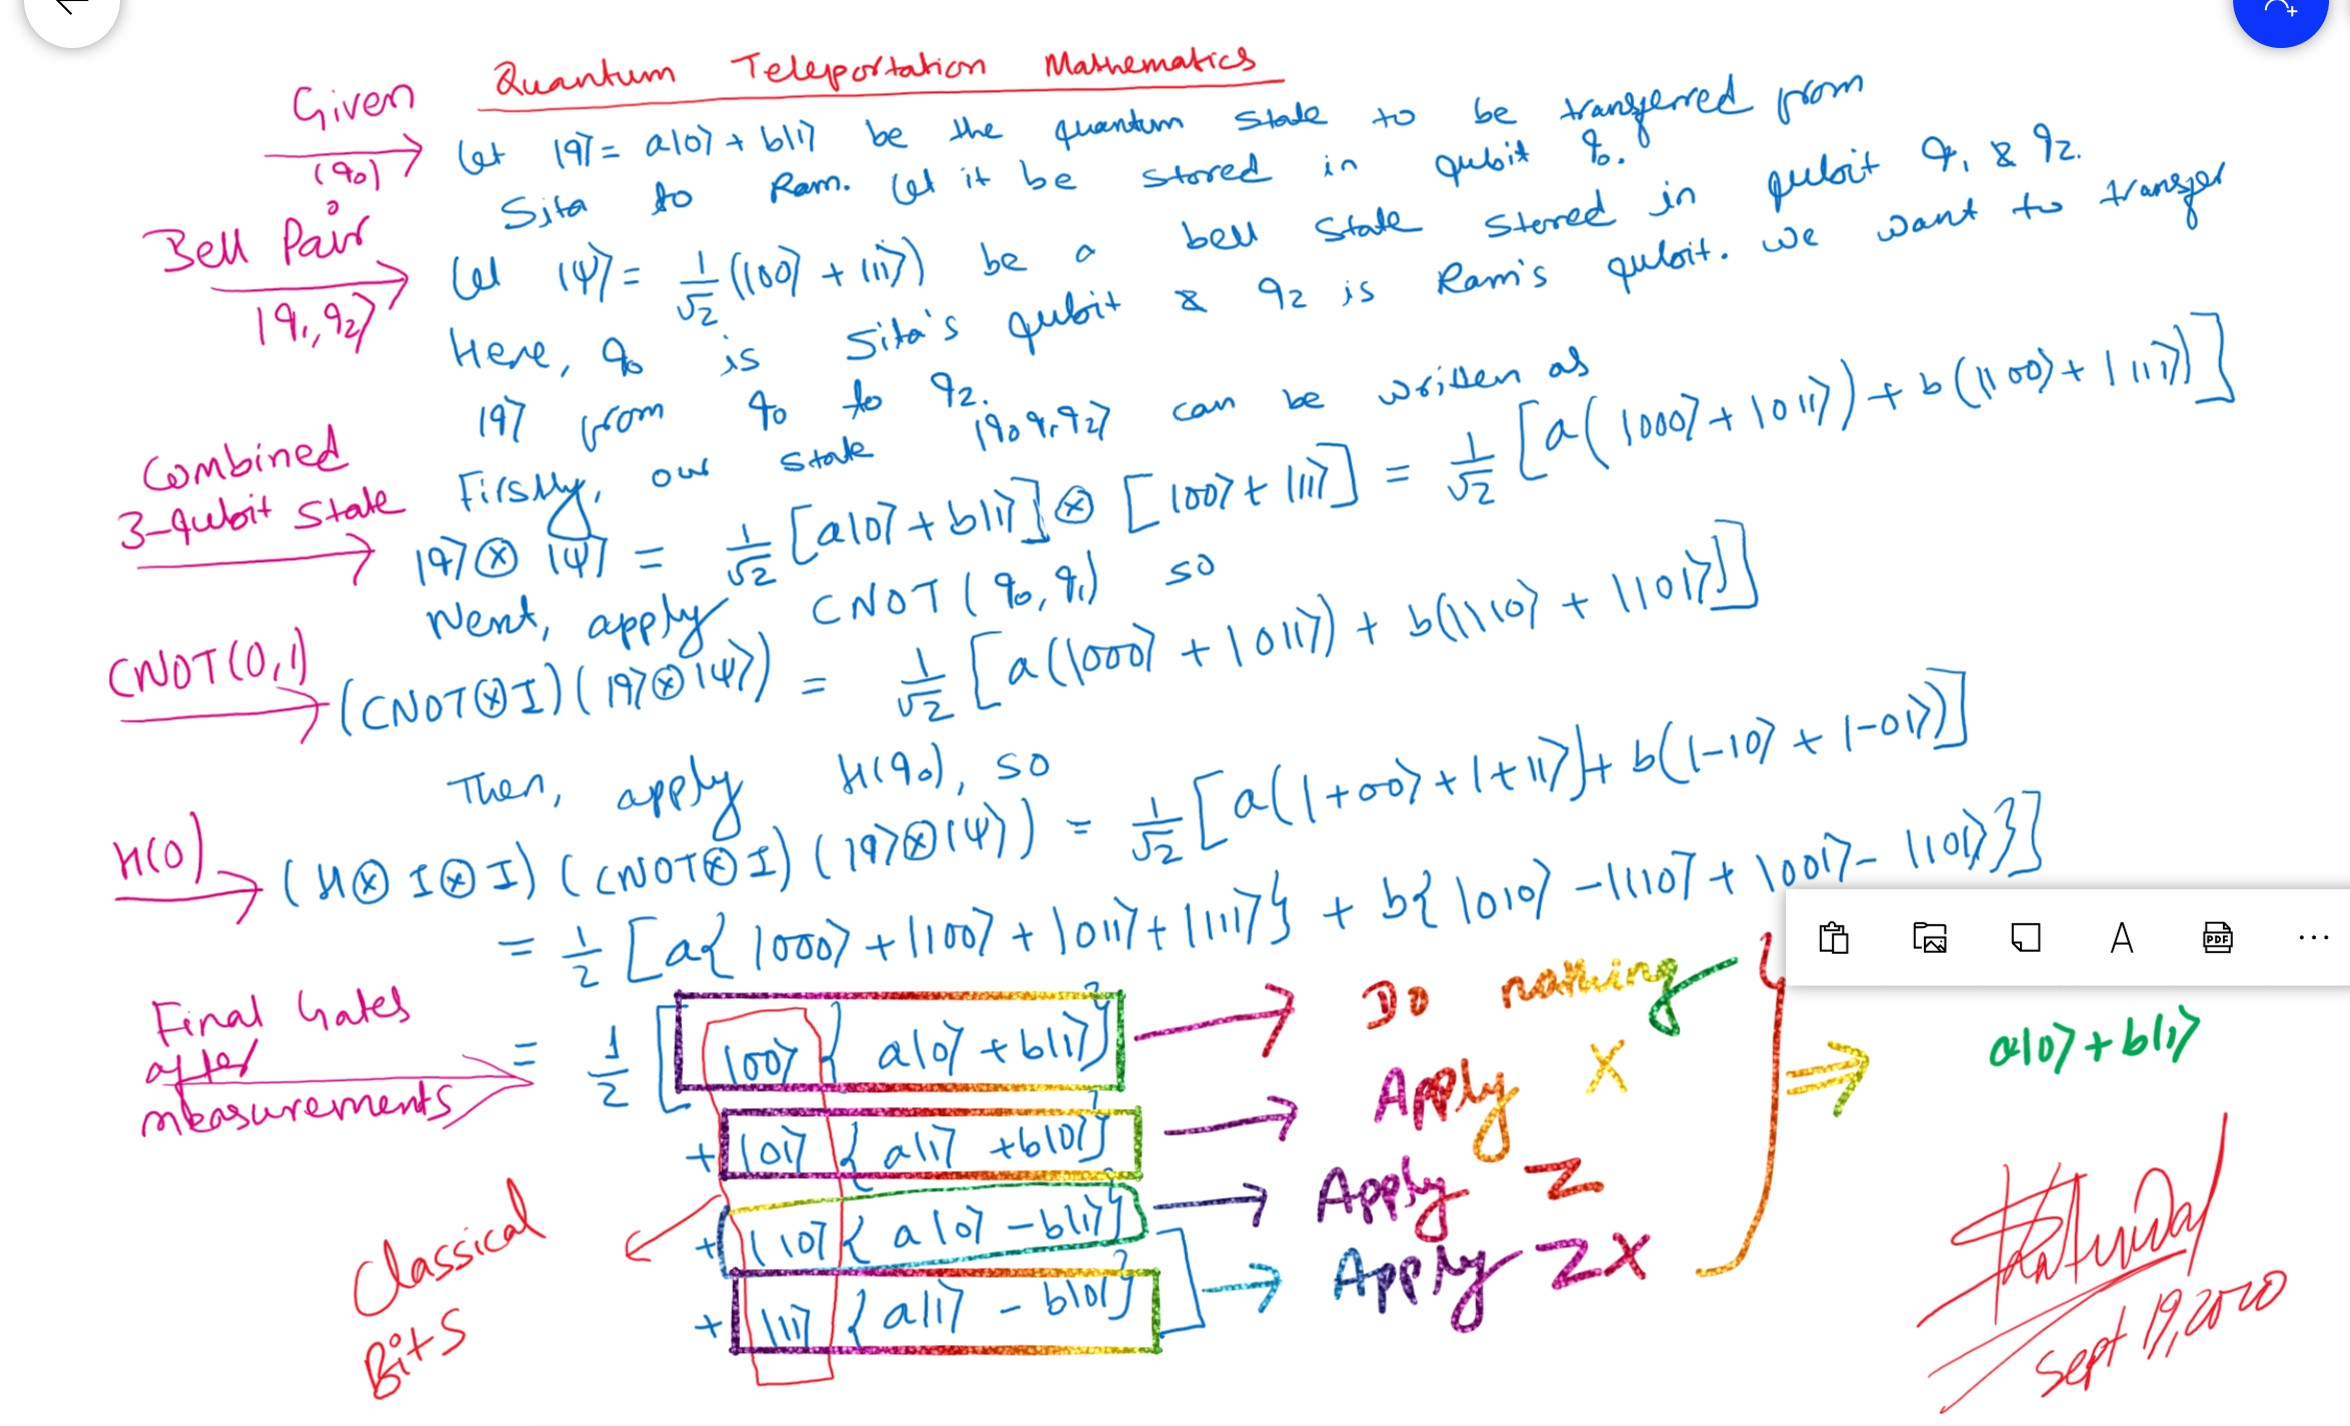

## Implementation of Quantum Teleportation Protocal

In [1]:
# Imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from math import sqrt

In [2]:
def prepare_state(qc,given_state,val,a=0):
    """ This prepares the Initial or given State that is to be transferred."""
    
    # checking what it is
    if val=='y':
        print("Here's the given State that is to be transferred")
        array_to_latex(given_state, pretext="|q\\rangle=")
        display(plot_bloch_multivector(given_state))
            
    
    # Keeping the initial state in q0 of the Quantum Circuit
    initial_state= Initialize(given_state)
    initial_state.label="Given"
    qc.append(initial_state, [a])
    qc.barrier()
    return initial_state

In [3]:
def create_bell_pair(qc,b=1,c=2):
    """This creates a Bell Pair."""
    qc.h(c)
    qc.cx(c,b)
    qc.barrier()

In [4]:
def sender_gate(qc,a=0,b=1):
    """Sender performs the following operation"""
    qc.cx(a,b)
    qc.h(a)
    qc.barrier()

In [23]:
def sender_measurement(qc,a=0,b=1):
    """Sender measures two of her qubits"""
    qc.measure(a,crz)
    qc.measure(b,crx)
    qc.barrier()

In [22]:
def receiver_gate(qc,c=2):
    """Receiver Performs the following gates. The gates are applied if the registers are in state 1."""
    qc.x(c).c_if(crx,1)
    qc.z(c).c_if(crz,1)
    qc.barrier()

In [7]:
def real_receiver_gate(qc,a=0,b=1,c=2):
    """Use this receiver gate instead of sender_measurement and receiver_gate if using a real computer."""
    qc.cz(a,c)
    qc.cx(b,c)
    qc.barrier()

In [26]:
def quantum_teleportation(given_state,init_display='n',computer='simulation'):
    # Setting up the required circuit
    if computer=='real':
        qr=QuantumRegister(3,name="q") #Three Qubits
        cr=ClassicalRegister(1,name="cr") #One Classical Bit
        qc=QuantumCircuit(qr,cr)
    else:
        qr=QuantumRegister(3, name="q") # Three Qubits
        crz=ClassicalRegister(1, name="crz") # Classical Bit which gives signal to apply Z gate in q3
        crx=ClassicalRegister(1,name="crx") # Classical Bit which gives signal to apply X gate in q3
        qc=QuantumCircuit(qr,crz,crx)

    #prompt to check things
    if init_display !='n':
        init_display=input("Do you want to see what the input and circuit are? type y for yes and n for no. ")
    
    # Preparing the state to be transferred
    initial_state=prepare_state(qc,given_state,init_display)

    # Creating an entangled state
    create_bell_pair(qc)

    # Applying sendeer's gate
    sender_gate(qc)

    if computer=='real':
        real_receiver_gate(qc)
    else:
        # Measuring two bits, q0 and q1
        sender_measurement(qc)

        # Receiver extracts the sent state
        receiver_gate(qc)

    # Check the Circuit and initial state
    if init_display=='y':
        display(qc.draw('mpl'))
        
    return qc,initial_state

Do you want to see what the input and circuit are? type y for yes and n for no. y
Here's the given State that is to be transferred


<IPython.core.display.Math object>

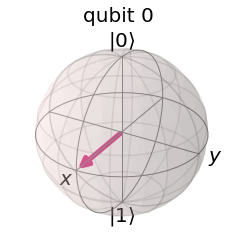

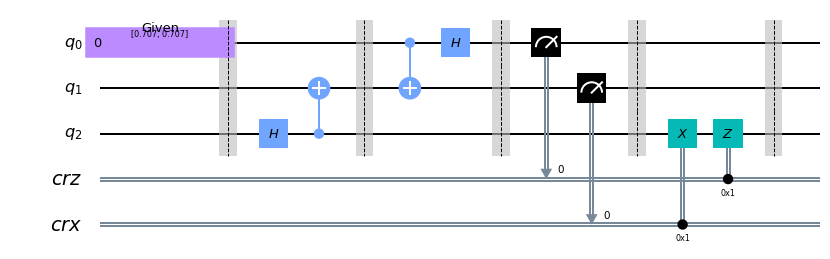

In [36]:
given=[1/sqrt(2),1/sqrt(2)]
qc,initial_state=quantum_teleportation(given,'y')

## Checking the result using the statevector simulator

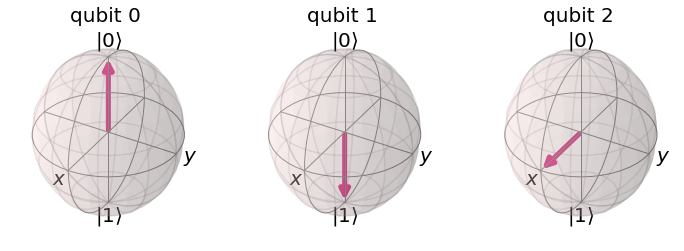

In [37]:
final_state=execute(qc,BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(final_state)

## Checking the result using QASM simulator
On a real Quantum Computer, we would not be able to sample the statevector. But, because the quantum gates are reversible, we should be able to get back the state $|0\rangle$ from the state in $q_2$. 

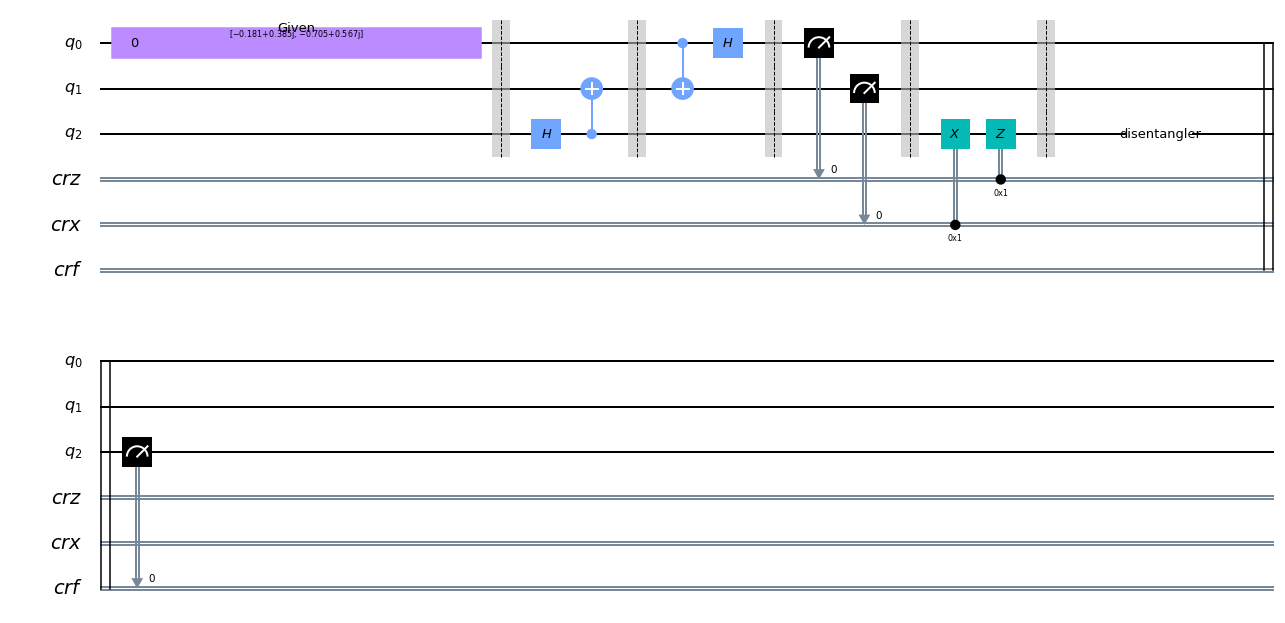

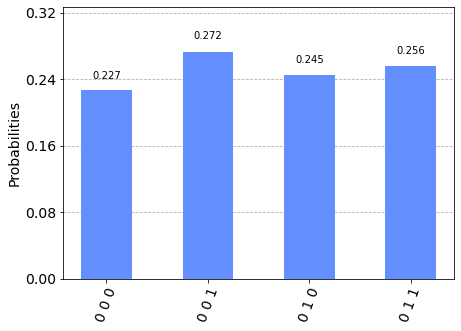

In [34]:
# Quantum Teleportation
given=random_state(1)
qc,initial_state=quantum_teleportation(given)

# Reversing the state
inverse_initial_state=initial_state.gates_to_uncompute()
qc.append(inverse_initial_state, [2])

# Adding new Classical Register to measure q2
cr_result=ClassicalRegister(1,name="crf")
qc.add_register(cr_result)
qc.measure(2,2)
display(qc.draw('mpl'))

# Running the Simulation
counts=execute(qc,BasicAer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Quantum Teleportation on a Real IBM Quantum Computer

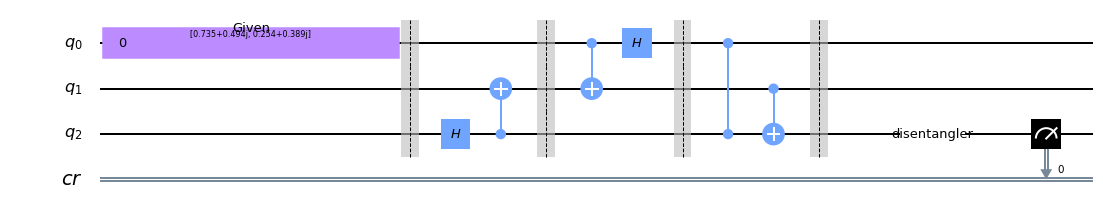

This result is from a Quantum Computing Simulator, but it uses the code for a real Quantum Computer.


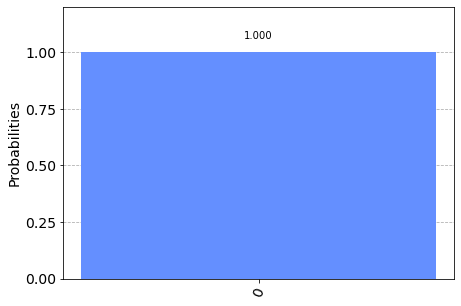

In [167]:
# Real Quantum Teleportation
given=random_state(1)
qc,initial_state=quantum_teleportation(given,'n','real')

# reversing the transported beat
inverse_initial_state=initial_state.gates_to_uncompute()
qc.append(inverse_initial_state,[2])

#doing the measurement
qc.measure(2,0)

#Drawing the circuit
display(qc.draw('mpl'))

#Checking Once with Simulator
print("This result is from a Quantum Computing Simulator, but it uses the code for a real Quantum Computer.")
counts_simulator=execute(qc,BasicAer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_simulator)

In [170]:
# Using Real IBM Computer
# We are checking what devices are we allowed to use by loading our account
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
provider.backends()

ibmqfactory.load_account:WARNING:2020-09-19 16:46:22,534: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [179]:
# get the least busy backend at IBM and run the circuit
#from qiskit.providers.ibmq import least_busy
#backend=least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits>=3 and
#                                     not b.configuration().simulator and b.status().operational==True))

#choosing a particular backend
backend=provider.get_backend('ibmq_16_melbourne')
job_exp = execute(qc,backend,shots=8000)

{'1': 2339, '0': 5661}


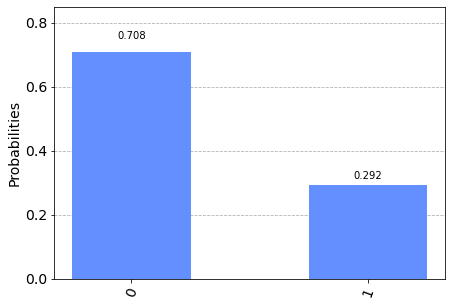

In [180]:
#Getting the result and displaying them
exp_result = job_exp.result()
exp_counts = exp_result.get_counts()
print(exp_counts)
plot_histogram(exp_counts)

In [25]:
qr=QuantumRegister(3, name="q") # Three Qubits
crz=ClassicalRegister(1, name="crz") # Classical Bit which gives signal to apply Z gate in q3
crx=ClassicalRegister(1,name="crx") # Classical Bit which gives signal to apply X gate in q3
qc=QuantumCircuit(qr,crz,crx)